# MNIST Classifier Using an MLP - Hello World of Deep Learning (DL)! - CNN on CPU
<hr/>

## Introduction

This notebook is inffixed with __LEVEL HERO DEMO__ because it is a finalized performant ML classifier for the [MNIST](https://paperswithcode.com/dataset/mnist) dataset. This set is presented by your instructor during the lecture. Please confer to the lecture notes for further details.

This notebook is a __demonstration notebook__ to: 
- test your DEV environment,
- show you how developing a ML model can be very simple,
- show you how a simple MLP can achieve quite-human performance in the simple task of recognizing hand-written digits.

>__Note:__
>
>One can see the suffix __CPU__ to indicate that the NN architecture was lowered to allow a training on common CPU devices. Indeed, a __MLP__ is used here instead of a proper CNN architecture. Thus, the performances are downgraded compared to a __CNN__ model trained on a __GPU__ device.
>
>I you want to go to production, please prefer the __CNN__ version instead of the __MLP__ ones.

__Key indicators for this Notebook__

- batch size = 8
- nb epochs = 10
- architecture =
   - 1 hidden dense layer of 64 units
   - 1 output dense layer of 10 units  
   - Trainable params = 501,898 (1.91 MB) 
- Training avarage time = 600 seconds
- val accuracy = 92.21% 

## Imports

In [1]:
import os
import time
import idx2numpy
import numpy as np ; np.random.seed(42)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf ; tf.random.set_seed(42)

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from mpl_toolkits.axes_grid1 import ImageGrid

2025-03-13 12:29:01.420201: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 12:29:01.566983: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 12:29:01.690375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741868941.810066  118313 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741868941.833755  118313 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 12:29:02.047809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Hardware

In [2]:
CPUS = tf.config.list_physical_devices('CPU')
GPUS = tf.config.list_physical_devices('GPU')

print("[INFO] Num CPUs:", len(CPUS), ", list = ", CPUS)
print("[INFO] Num GPUs:", len(GPUS), ", list = ", GPUS)

[INFO] Num CPUs: 1 , list =  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[INFO] Num GPUs: 0 , list =  []


2025-03-13 12:29:06.719574: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Notebook parameters

In [3]:
# NumPy

np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

# TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to disable TF debug logging messages 

## Globals & hyperparameters

In [4]:
# =============
# DATA_TOPDIR
# =============

# Contain the (un)compressed idx files of MNIST

# on assieoussou (Laptop - CPU)
DATA_TOPDIR = "/home/ml/datasets/mnist"

# on your machine.... 

# =======
# MNIST 
# =======

# dataset files
TRAIN_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-images-idx3-ubyte")
TRAIN_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-labels-idx1-ubyte")
TEST_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-images-idx3-ubyte")
TEST_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-labels-idx1-ubyte")

# The MNIST images format
num_pixels = 28 * 28

# the total number of digits
num_classes = 10

# ==========================
# Training hyperparameters
# ==========================

epochs = 10
batch_size = 8

# =======
# Demo 
# =======

# Demo dir: where demonstration images are placed
DEMO_DIR = os.path.join(DATA_TOPDIR, "demo")
os.makedirs(DEMO_DIR, exist_ok=True)

# for demo images 
nb_demo = 10
demo_prefix = "demo_img_"


## Data Preparation (Part I)

>__Note:__
>
>In this notebook, all the steps regarding the understanding of the data are skipped. Indeed, in practice Data Scientist spend __80%__ of their time here!



In [5]:
# 1. Read each dataset into a conventional numpy 2D array
train_x_ndarray = idx2numpy.convert_from_file(TRAIN_IMAGES_DATASET_FILE)
train_y_ndarray = idx2numpy.convert_from_file(TRAIN_LABELS_DATASET_FILE)

test_x_ndarray = idx2numpy.convert_from_file(TEST_IMAGES_DATASET_FILE)
test_y_ndarray = idx2numpy.convert_from_file(TEST_LABELS_DATASET_FILE)

# let us create a validation set from the training one: 

valid_size = 10000
valid_x_ndarray = train_x_ndarray[:valid_size]
valid_y_ndarray = train_y_ndarray[:valid_size]

# remove from train
train_x_ndarray = train_x_ndarray[valid_size:]
train_y_ndarray = train_y_ndarray[valid_size:]

print(train_x_ndarray.shape, train_y_ndarray.shape)
print(valid_x_ndarray.shape, valid_y_ndarray.shape)
print(test_x_ndarray.shape, test_y_ndarray.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


(50000, 28, 28) (50000,)
train_x_ndarray[0] = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  29 150 195 254 255 254 176 193 150  96   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  48 166 224 253 253 234 196 253 253 253 253 233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93 244 249 253 187  46  10   8   4  10 194 253 253 233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 107 253 253

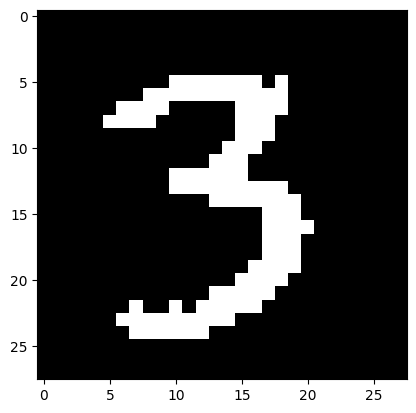

In [6]:
# quick check 
print(train_x_ndarray.shape, train_y_ndarray.shape) # => (60000, 28, 28) (60000,)
print(f"train_x_ndarray[0] = \n{train_x_ndarray[0]}, \ntrain_y_ndarray[0] = {train_y_ndarray[0]}" )
print(train_x_ndarray[0].shape, train_y_ndarray[0].shape) # => (28, 28) ()

# load and display as b&w
# plt.imshow(train_x_ndarray[0], cmap='gray')  # RGB
plt.imshow(Image.fromarray(train_x_ndarray[0]).convert('1'), cmap='gray')

## Model construction & configuration

In [7]:
def build_model():
    model = Sequential()
    # =================================
    # Feature extractor
    # =================================
    model.add(Input(shape=(28,28,1))),
    model.add(Dense(64, activation="relu"))
    # =================================
    # Neck
    # =================================
    model.add(Flatten()),
    # =================================
    # Head/Output 
    # =================================
    model.add(Dense(units=num_classes, activation="softmax"))
    # =================================
    # Compile model
    # =================================
    model.compile(loss="categorical_crossentropy", 
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=["accuracy"])
    return model

# Construct the model and show it
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28, 28, 64)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       501,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501,898 (1.91 MB)

 Trainable params: 501,898 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

## Data Preparation (Part II)

>__Note:__
>
> Now we know our taget ML model; thus we need to finalize the preparation of our data according this model (see the Input shape of (28, 28, 1). We don't have to do a lot of work since the original images format is quite similar.

In [8]:
X_train = train_x_ndarray.astype('float32')
X_test = test_x_ndarray.astype('float32')

# make sure you are not introducing nan
X_train = np.nan_to_num(X_train, nan=0)
X_test = np.nan_to_num(X_test, nan=0)

# normalization: VERY IMPORTANT!!!!
X_train = X_train / 255
X_test = X_test / 255

# one hot encoding of labels
y_train = to_categorical(train_y_ndarray)
y_test = to_categorical(test_y_ndarray)
assert y_train.shape[1] == num_classes, f"[FATAL] The number of classes should be equal to {num_classes}. Abort!"

# before reshaping
print("[INFO] before reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)
print("[INFO] before reshaping >>> \n",X_train[0], y_train[0])

[INFO] before reshaping >>>  (50000, 28, 28) (28, 28) (50000, 10) (10000, 28, 28) (50000, 10)
[INFO] before reshaping >>> 
 [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0

In [28]:
# Explicit reshaping of training and testing data to (28, 28, 1)
# See other notebooks for details

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("[INFO] After reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)

[INFO] After reshaping >>>  (50000, 28, 28, 1) (28, 28, 1) (50000, 10) (10000, 28, 28, 1) (50000, 10)


## Model Training & Evaluation

__Construct the demonstration set__

Here, we isolate in the `demo/` subdirectory, some testing images. We'll use them later on - once our model is trained - to demonstrate how accurate it is. 

In [29]:
def reconstruct_demo_dir(nb, from_set, target_dir):
    # randomly collect the indices
    demo_rnd_indices = np.random.randint(1, high=len(from_set), size=nb)
    for i in demo_rnd_indices:
        plt.imsave(os.path.join(target_dir, demo_prefix + str(i) + ".jpg"), from_set[i], cmap='gray')
    print(f"[INFO] {len(demo_rnd_indices)} images have been created in {target_dir}")        

# check if the demo dir exists and contains at least nb_demo files

if os.path.exists(DEMO_DIR): 
    nb_files = len([name for name in os.listdir(DEMO_DIR) if os.path.isfile(os.path.join(DEMO_DIR, name))])
    if nb_files < nb_demo:
        # So you can safely manually add demo file 
        reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)
    else:
        print(f"[INFO] Nothing to do because {DEMO_DIR} contains already enough images!")
else: 
    reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)

[INFO] Nothing to do because /home/ml/datasets/mnist/demo contains already enough images!


__Test some demo images before training__

[INFO] Load demo images as Black'n White... 


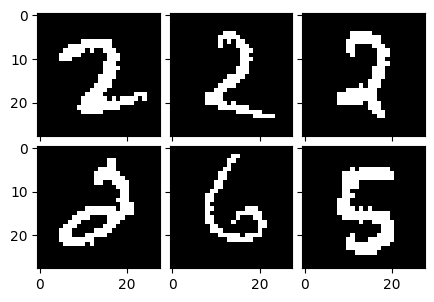

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[INFO] Prédictions:
 digit: 2 	 -  digit: 7 	 -  digit: 9 	 - 
 digit: 8 	 -  digit: 2 	 -  digit: 0 	 - 



In [30]:
nb_imgs = 6
nb_rows = 2
nb_cols = 3

# load as b&w images
print("[INFO] Load demo images as Black'n White... ")
demo_imgs = [Image.open(os.path.join(DEMO_DIR, name)).convert('1') for name in os.listdir(DEMO_DIR)[:nb_imgs]]

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(
    fig, 111,  # similar to subplot(111)
    nrows_ncols=(nb_rows, nb_cols),
    axes_pad=0.1,
)

for ax, img in zip(grid, demo_imgs):
    ax.imshow(img)
plt.show()

# Now let's predict

demo_imgs_arrays = np.array([
    np.asarray(demo_img).reshape(demo_img.size[0], demo_img.size[1], 1) 
    for demo_img in demo_imgs
]) 
raw_predictions = model.predict(demo_imgs_arrays)
# print(raw_predictions)


refined_predictions = []
for rp in raw_predictions:
    refined_predictions.append(np.argmax(rp))

print("[INFO] Prédictions:")

msg_pred = ""
cpt = 0
for i in range(nb_rows):
    for j in range(nb_cols):
        msg_pred += f" digit: {refined_predictions[cpt]} \t - "
        cpt += 1
    msg_pred += "\n"
    
print(msg_pred)

In [31]:
# Remind the hyperparameters values

t1 = time.time()

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Hyperparameters")
print("[INFO] ======================= ")
print("[INFO]")
print(f"[INFO] batch_size = {batch_size}")
print(f"[INFO] epochs = {epochs}")

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Train & Evaluate")
print("[INFO] ======================= ")
print("[INFO]")

# Fit the model
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=batch_size,
    validation_data=(X_test, y_test), 
    epochs=epochs
)

t2 = time.time()
print(f"[INFO] Duration = {t2-t1} seconds.")

# Note: 
# During the fit, monitor the GPUs activity using: $ watch -n 0.5 nvidia-smi

[INFO]
[INFO] ======================= 
[INFO] Hyperparameters
[INFO] ======================= 
[INFO]
[INFO] batch_size = 8
[INFO] epochs = 10
[INFO]
[INFO] ======================= 
[INFO] Train & Evaluate
[INFO] ======================= 
[INFO]
Epoch 1/10


2025-03-12 08:22:08.458167: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.8702 - loss: 0.4428 - val_accuracy: 0.9108 - val_loss: 0.3028
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.9151 - loss: 0.3060 - val_accuracy: 0.9120 - val_loss: 0.3000
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.9202 - loss: 0.2884 - val_accuracy: 0.9127 - val_loss: 0.2968
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.9232 - loss: 0.2781 - val_accuracy: 0.9147 - val_loss: 0.2916
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.9252 - loss: 0.2703 - val_accuracy: 0.9180 - val_loss: 0.2869
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.9264 - loss: 0.2654 - val_accuracy: 0.9216 - val_loss: 0.2780
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 62s 10ms/step - accuracy: 0.9280 - loss: 0.2618 - val_accuracy: 0.9213 - val_loss: 0.2802
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 62s 10ms/step - accuracy: 0.9292 - loss: 0.2579

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


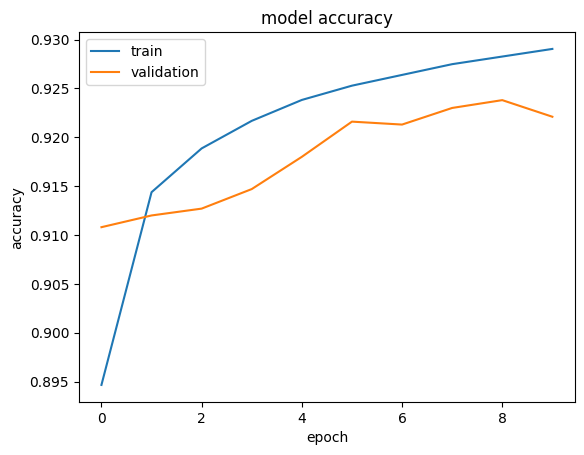

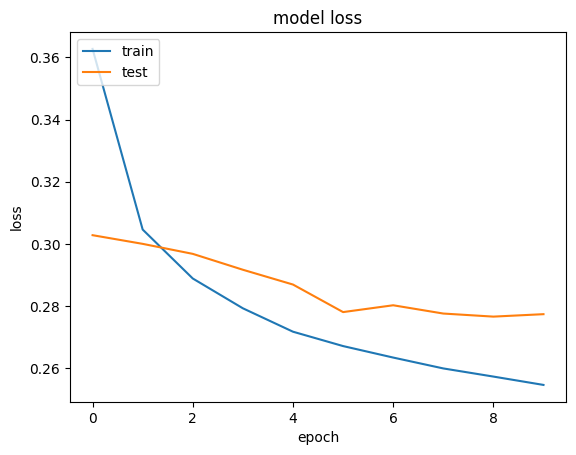

In [32]:
# check entries in the history 
print(history.history.keys()) # => dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [33]:
# Final evaluation of the model
scores = model.evaluate(
    x=X_test, 
    y=y_test, 
    verbose=0
)

print("\n[INFO] Model Val Accuracy: %.2f%%, Error: %.2f%%" % (scores[1]*100, 100-scores[1]*100))


[INFO] Model Val Accuracy: 92.21%, Error: 7.79%


__Test some demo images afetr training__

[INFO] Previous demo images... 


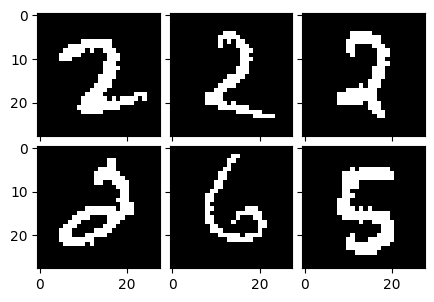

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[INFO] Prédictions:
 digit: 2 	 -  digit: 2 	 -  digit: 2 	 - 
 digit: 2 	 -  digit: 6 	 -  digit: 5 	 - 



In [34]:
# lest reulse the same previous demo settings...

print("[INFO] Previous demo images... ")
fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(
    fig, 111,  # similar to subplot(111)
    nrows_ncols=(nb_rows, nb_cols),
    axes_pad=0.1,
)

for ax, img in zip(grid, demo_imgs):
    ax.imshow(img)
plt.show()

# Now let's predict (again)
raw_predictions = model.predict(demo_imgs_arrays)

refined_predictions = []
for rp in raw_predictions:
    refined_predictions.append(np.argmax(rp))

print("[INFO] Prédictions:")

msg_pred = ""
cpt = 0
for i in range(nb_rows):
    for j in range(nb_cols):
        msg_pred += f" digit: {refined_predictions[cpt]} \t - "
        cpt += 1
    msg_pred += "\n"
    
print(msg_pred)

__END OF NOTEBOOK.__